In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
%matplotlib inline

In [3]:
#path to project
path = r'/Users/rendo/A6_Shootings'

In [4]:
shootings = pd.read_csv(os.path.join(path, '02 Data','prepared Data','Mass_murders.csv'))

In [5]:
shootings.shape

(3084, 11)

In [6]:
shootings.head()

,Unnamed: 0,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested
0,0,2728246,12-Oct-23,Minnesota,Princeton,200 block of 190th Ave NE,0,5,0,1,1
1,1,2727876,10-Oct-23,Wisconsin,Madison,116 Milky Way,1,3,0,0,0
2,2,2725771,8-Oct-23,Illinois,Chicago,316 W Erie St,0,8,0,0,0
3,3,2725838,8-Oct-23,Pennsylvania,Indiana,640 N 5th Ave,1,8,0,0,0
4,4,2726444,8-Oct-23,Louisiana,Gonzales,616 N Tobey Ave,0,4,0,0,0


In [7]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
# Create a subset which contains only the 'Happiness_Score' and indicators

sub = shootings[['Victims Killed', 'Suspects Killed', 'Suspects Injured', 'Victims Injured', 'Suspects Arrested']]

In [11]:
# Create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] 

score

C:\Users\rendo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rendo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rendo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rendo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-221575.9075875486,
 -27460.86798572817,
 -19746.387973709578,
 -13809.952138562707,
 -10515.980210745665,
 -8915.541707092418,
 -7646.353925184109,
 -6600.668705358064,
 -5727.535205059908]

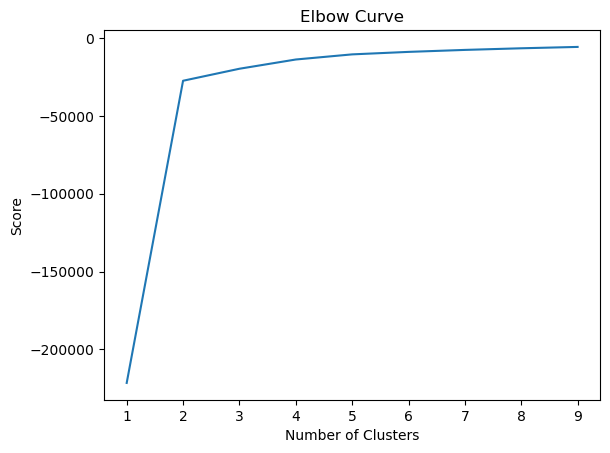

In [12]:
# Plot the elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### The elbow breaks in between 1 and 2 on clusters and around -25000 on the score.

In [19]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 2) 



In [21]:
# Fit the k-means object to the data.

kmeans.fit(sub)

C:\Users\rendo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [22]:
sub['clusters'] = kmeans.fit_predict(sub)

C:\Users\rendo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rendo\AppData\Local\Temp\ipykernel_19984\3683309691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [23]:
sub.head() 

,Victims Killed,Suspects Killed,Suspects Injured,Victims Injured,Suspects Arrested,clusters
0,0,0,1,5,1,0
1,1,0,0,3,0,0
2,0,0,0,8,0,0
3,1,0,0,8,0,0
4,0,0,0,4,0,0


In [24]:
sub['clusters'].value_counts()

clusters
0    3083
1       1
Name: count, dtype: int64

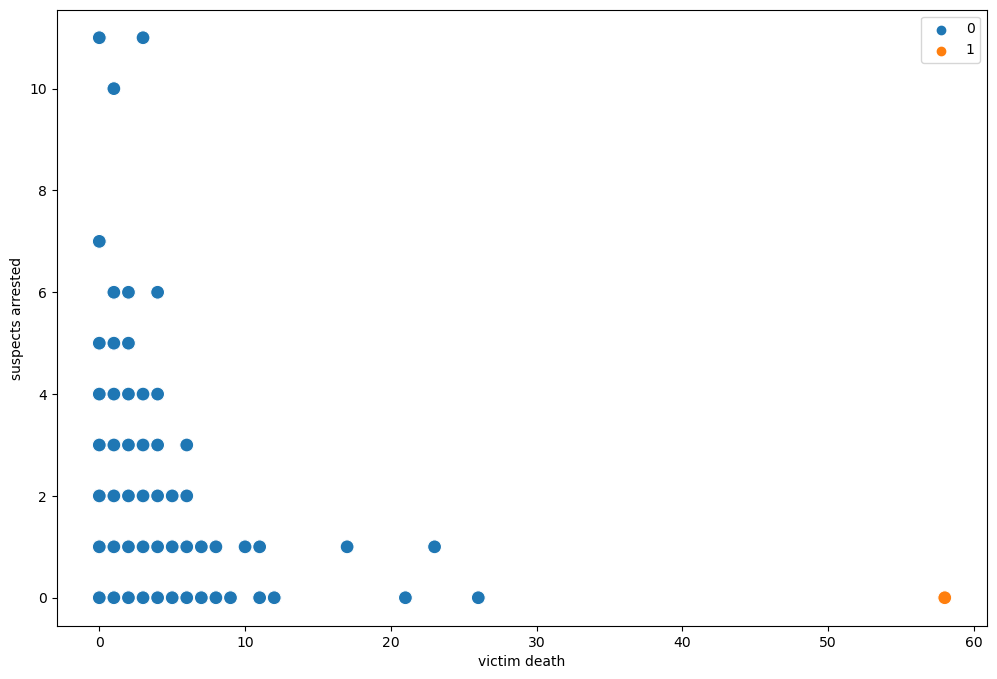

In [26]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['Victims Killed'], y=sub['Suspects Arrested'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('victim death') # Label x-axis.
plt.ylabel('suspects arrested') # Label y-axis.
plt.show()

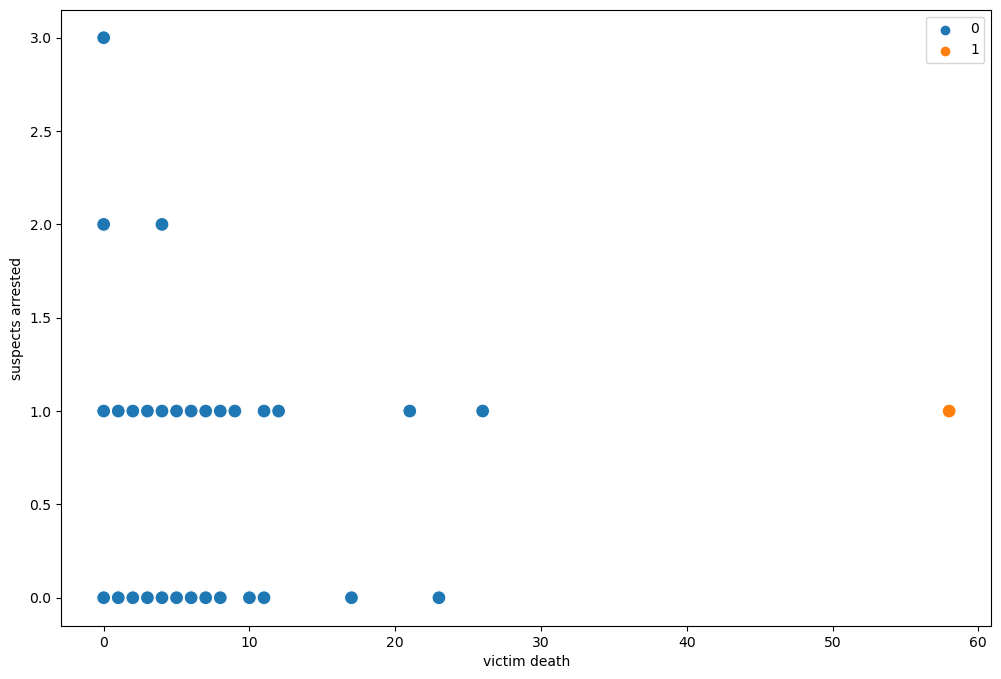

In [29]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['Victims Killed'], y=sub['Suspects Killed'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('victim death') 
plt.ylabel('suspects arrested') 
plt.show()

### Step 8
I'm not entirely sure if i understand the clustering. I feel like it's clustering based on victim deaths where anything under 30 is one cluster and anything over 30 is another cluster.

In [30]:
sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\rendo\AppData\Local\Temp\ipykernel_19984\749661046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'


In [32]:
sub.groupby('cluster').agg({'Victims Killed':['mean', 'median'], 
                         'Suspects Killed':['mean', 'median'], 
                         'Suspects Arrested':['mean', 'median'],
                          'Victims Injured':['mean', 'median']})

Victims Killed        Suspects Killed        Suspects Arrested         \
                  mean median            mean median              mean median   
cluster                                                                         
pink          1.010704    1.0        0.061628    0.0          0.556601    0.0   
purple       58.000000   58.0        1.000000    1.0          0.000000    0.0   

        Victims Injured         
                   mean median  
cluster                         
pink           4.045735    4.0  
purple       441.000000  441.0

### Step 10
These results could be used to see there isn't really a relation in any of the clusters. If that one outlier gets taken away with 58 victim deaths everything would be clustered the same.
